In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt


In [3]:
pip install soccerplots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from soccerplots.radar_chart import Radar

In [29]:
df = pd.read_csv('/content/Nunez v Haaland.csv')
df

,Name,Age,Squad,Country,Comp,LgRank,90s,Goals,Shots,Shots on Target,...,Goals/SoT,Dist,FK,Penalty Kicks,Penalty Kicks attempted,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Darwin Nunez,22,Benfica,pt POR,1. Primeira Liga,3rd,22.0,26,85,44,...,0.50,NaN,NaN,4,4,NaN,NaN,NaN,NaN,NaN
1,Erling Haaland,21,Dortmund,de GER,1. Bundesliga,2nd,21.2,22,74,31,...,0.52,13.5,0.0,6,6,17.6,13.0,0.18,4.4,3.0


In [31]:
# Dropping all missing values attributes
df = df.dropna(axis = 1)
df

,Name,Age,Squad,Country,Comp,LgRank,90s,Goals,Shots,Shots on Target,SoT%,Shots/90,SoT/90,Goals/Shot,Goals/SoT,Penalty Kicks,Penalty Kicks attempted
0,Darwin Nunez,22,Benfica,pt POR,1. Primeira Liga,3rd,22.0,26,85,44,51.8,3.87,2.00,0.26,0.50,4,4
1,Erling Haaland,21,Dortmund,de GER,1. Bundesliga,2nd,21.2,22,74,31,41.9,3.49,1.46,0.22,0.52,6,6


In [32]:
params = list(df.columns)
params

['Name',
 'Age',
 'Squad',
 'Country',
 'Comp',
 'LgRank',
 '90s',
 'Goals',
 'Shots',
 'Shots on Target',
 'SoT%',
 'Shots/90',
 'SoT/90',
 'Goals/Shot',
 'Goals/SoT',
 'Penalty Kicks',
 'Penalty Kicks attempted']

In [33]:
params = params[7:]
params

['Goals',
 'Shots',
 'Shots on Target',
 'SoT%',
 'Shots/90',
 'SoT/90',
 'Goals/Shot',
 'Goals/SoT',
 'Penalty Kicks',
 'Penalty Kicks attempted']

In [34]:
# adding ranges to the tuples
ranges = []
a_values = []
b_values = []
for i in params:
  a = min(df[params][i])
  a = .7 * a
  b = max(df[params][i])
  b = 1.15 * b

  ranges.append((a,b))

ranges

[(15.399999999999999, 29.9),
 (51.8, 97.74999999999999),
 (21.7, 50.599999999999994),
 (29.33, 59.56999999999999),
 (2.443, 4.4505),
 (1.022, 2.3),
 (0.154, 0.299),
 (0.35, 0.598),
 (2.8, 6.8999999999999995),
 (2.8, 6.8999999999999995)]

In [35]:
for i in range(len(df['Name'])):
  if df['Name'][i] == 'Darwin Nunez':
    a_values = list(df.iloc[i].values)
  if df['Name'][i] == 'Erling Haaland':
    b_values = list(df.iloc[i].values)

a_values = a_values[7:]
b_values = b_values[7:]
values = [a_values,b_values]
values

[[26, 85, 44, 51.8, 3.87, 2.0, 0.26, 0.5, 4, 4],
 [22, 74, 31, 41.9, 3.49, 1.46, 0.22, 0.52, 6, 6]]

In [36]:
title = dict(
    title_name = "Darwin Núñez",
    title_color = 'red',
    subtitle_name = 'S.L. Benfica 21/22',
    subtitle_color = 'red',
    title_name_2 = "Erling Haaland",
    title_color_2 = 'blue',
    subtitle_name_2 = 'Borussia Dortmund 21/22',
    subtitle_color_2 = 'blue'
)

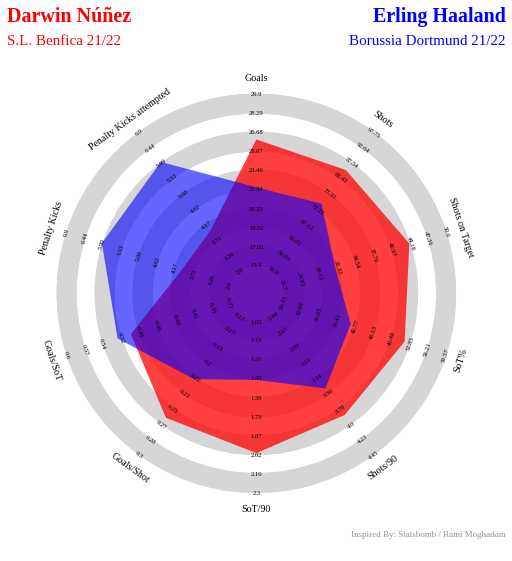

In [37]:
radar = Radar()
figure = radar.plot_radar(ranges = ranges, params = params, values = values, radar_color = ['red','blue'], alphas = [.75,.6], title = title, compare = True)